# Excercício Estatística Básica - prof Valberto Feitosa - IFCE

## Criação do dataframe

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
#lista de 26 crianças
sujeitos = list(range(1,27))

# lista aleatória de sexo (masc, fem)
sexo = np.random.choice(['Masculino','Feminino'], size=26)

# Dados reais do livro para a escova Hugger
hugger_antes = [2.18,2.05,1.05,1.95,0.28,2.63,1.50,0.45,0.70,1.30,1.25,0.18,3.30,1.40,0.90,0.58,2.50,2.25,1.53,1.43,3.48,1.80,1.50,2.55,1.30,2.65]
hugger_depois = [0.43,0.08,0.18,0.78,0.03,0.023,0.20,0.00,0.05,0.30,0.33,0.00,0.90,0.24,0.15,0.10,0.33,0.33,0.53,0.43,0.65,0.20,0.25,0.15,0.05,0.25]

# Gerando dados aleatórios para a escova convencional
convencional_antes = np.random.uniform(0.65, 2.5, size=26).round(2)
convencional_depois = np.random.uniform(.04, 1.2, size=26).round(2)


In [17]:
print(len(hugger_antes))
print(len(hugger_depois))

26
26


In [18]:
# Criando o DataFrame
df = pd.DataFrame({
    'Sujeito': sujeitos,
    'Sexo': sexo,
    'Hugger Antes': hugger_antes,
    'Hugger Depois': hugger_depois,
    'Convencional Antes': convencional_antes,
    'Convencional Depois': convencional_depois
})

# Exibindo os primeiros dados
df.head()

,Sujeito,Sexo,Hugger Antes,Hugger Depois,Convencional Antes,Convencional Depois
0,1,Masculino,2.18,0.43,1.41,0.57
1,2,Feminino,2.05,0.08,1.99,0.39
2,3,Masculino,1.05,0.18,1.62,0.92
3,4,Feminino,1.95,0.78,1.51,0.06
4,5,Feminino,0.28,0.03,1.06,1.07


## Análise Descritia

### Estatística Descritivas por Tipo de Escovação

In [20]:
print(df.describe())


         Sujeito  Hugger Antes  Hugger Depois  Convencional Antes  \
count  26.000000     26.000000      26.000000           26.000000   
mean   13.500000      1.641923       0.267808            1.531154   
std     7.648529      0.883154       0.237182            0.533399   
min     1.000000      0.180000       0.000000            0.680000   
25%     7.250000      1.100000       0.085000            1.082500   
50%    13.500000      1.500000       0.220000            1.460000   
75%    19.750000      2.232500       0.330000            2.035000   
max    26.000000      3.480000       0.900000            2.430000   

       Convencional Depois  
count            26.000000  
mean              0.611923  
std               0.334581  
min               0.060000  
25%               0.400000  
50%               0.565000  
75%               0.915000  
max               1.190000  


### Comparação da Redução da Placa

In [29]:
# índice de redução = (antes - depois) / antes
df['Reducao Hugger'] = ((df['Hugger Antes'] - df['Hugger Depois']) / df['Hugger Antes'])
df['Reducao Convencional'] = ((df['Convencional Antes'] - df['Convencional Depois']) / df['Convencional Antes'])



In [30]:
print(df[['Sujeito', 'Reducao Hugger', 'Reducao Convencional']].head())

   Sujeito  Reducao Hugger  Reducao Convencional
0        1        0.802752              0.595745
1        2        0.960976              0.804020
2        3        0.828571              0.432099
3        4        0.600000              0.960265
4        5        0.892857             -0.009434


## Visualização dos Dados

In [31]:
print(df.head(10))

   Sujeito       Sexo  Hugger Antes  Hugger Depois  Convencional Antes  \
0        1  Masculino          2.18          0.430                1.41   
1        2   Feminino          2.05          0.080                1.99   
2        3  Masculino          1.05          0.180                1.62   
3        4   Feminino          1.95          0.780                1.51   
4        5   Feminino          0.28          0.030                1.06   
5        6  Masculino          2.63          0.023                2.43   
6        7  Masculino          1.50          0.200                0.80   
7        8   Feminino          0.45          0.000                2.05   
8        9  Masculino          0.70          0.050                2.07   
9       10   Feminino          1.30          0.300                0.89   

   Convencional Depois  Reducao Hugger  Reducao Convencional  
0                 0.57        0.802752              0.595745  
1                 0.39        0.960976              0.80402

In [ ]:
# há valores negativos devido o uso de dados randomicos, por isso resolvi tratar outliers pelo metodo IQR

In [36]:
# Função para remover outliers usando o método do IQR (Interquartil)
def remover_outliers(df, coluna):
    Q1 = df[coluna].quantile(0.25)  # Primeiro quartil (25%)
    Q3 = df[coluna].quantile(0.75)  # Terceiro quartil (75%)
    IQR = Q3 - Q1  # Intervalo interquartil
    
    # Definir limites para detecção de outliers
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    
    # Filtrar os dados sem os outliers
    df_filtrado = df[(df[coluna] >= limite_inferior) & (df[coluna] <= limite_superior)]
    
    return df_filtrado

# Aplicando a remoção de outliers nas colunas de Redução
df_sem_outliers = remover_outliers(df, 'Reducao Hugger')
df_sem_outliers = remover_outliers(df_sem_outliers, 'Reducao Convencional')

In [39]:
# Removendo valores negativos no índice de redução da placa
df_sem_outliers = df_sem_outliers[(df_sem_outliers['Reducao Hugger'] >= 0) & (df_sem_outliers['Reducao Convencional'] >= 0)]

# Exibindo o DataFrame corrigido
print(df_sem_outliers[['Sujeito', 'Reducao Hugger', 'Reducao Convencional']])


    Sujeito  Reducao Hugger  Reducao Convencional
0         1        0.802752              0.595745
1         2        0.960976              0.804020
2         3        0.828571              0.432099
5         6        0.991255              0.695473
6         7        0.866667              0.925000
7         8        1.000000              0.419512
8         9        0.928571              0.811594
9        10        0.769231              0.404494
10       11        0.736000              0.878049
11       12        1.000000              0.846154
12       13        0.727273              0.593220
13       14        0.828571              0.195122
14       15        0.833333              0.676692
15       16        0.827586              0.767635
16       17        0.868000              0.543379
17       18        0.853333              0.085714
18       19        0.653595              0.217391
19       20        0.699301              0.622047
20       21        0.813218              0.938967


In [40]:
print(df_sem_outliers[['Reducao Hugger', 'Reducao Convencional']].describe())

       Reducao Hugger  Reducao Convencional
count       22.000000             22.000000
mean         0.848727              0.611595
std          0.097444              0.238946
min          0.653595              0.085714
25%          0.805369              0.459919
50%          0.833333              0.627263
75%          0.918651              0.799875
max          1.000000              0.938967


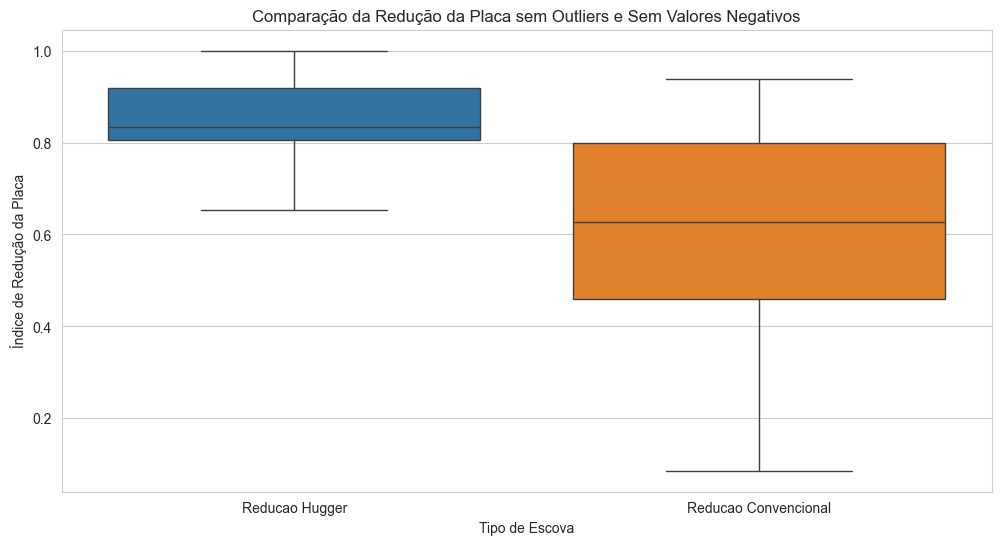

In [41]:
# Ajustando o estilo do gráfico
sns.set_style("whitegrid")

# Criando o Boxplot atualizado após remoção dos outliers e valores negativos
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_sem_outliers[['Reducao Hugger', 'Reducao Convencional']])
plt.title('Comparação da Redução da Placa sem Outliers e Sem Valores Negativos')
plt.ylabel('Índice de Redução da Placa')
plt.xlabel('Tipo de Escova')

# Exibir o gráfico
plt.show()


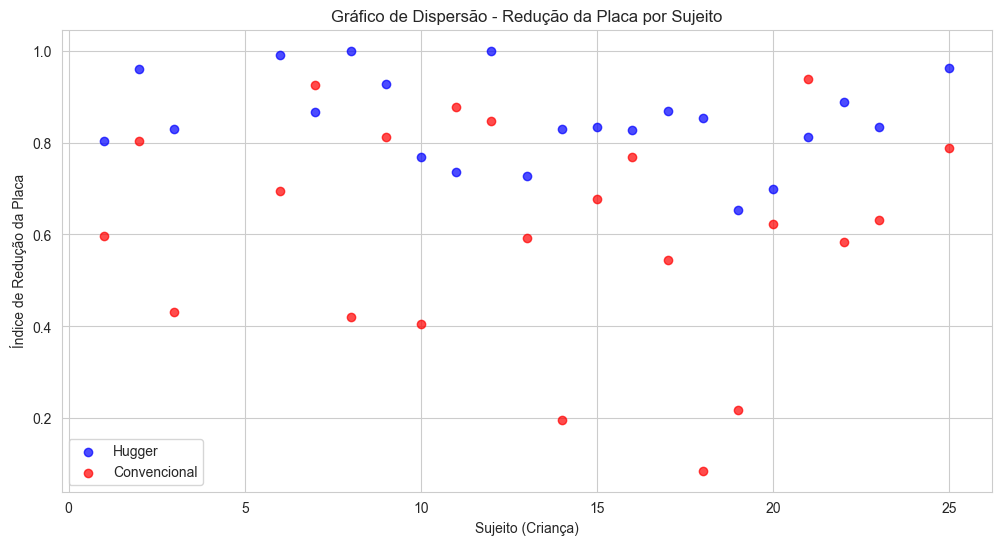

In [42]:
# Importando bibliotecas necessárias
import matplotlib.pyplot as plt

# Criando o gráfico de dispersão para visualizar a redução da placa por sujeito
plt.figure(figsize=(12, 6))

# Plotando os pontos da escova Hugger
plt.scatter(df_sem_outliers['Sujeito'], df_sem_outliers['Reducao Hugger'], 
            label='Hugger', alpha=0.7, color='blue')

# Plotando os pontos da escova Convencional
plt.scatter(df_sem_outliers['Sujeito'], df_sem_outliers['Reducao Convencional'], 
            label='Convencional', alpha=0.7, color='red')

# Adicionando rótulos e título
plt.title('Gráfico de Dispersão - Redução da Placa por Sujeito')
plt.xlabel('Sujeito (Criança)')
plt.ylabel('Índice de Redução da Placa')
plt.legend()
plt.grid(True)

# Exibir o gráfico
plt.show()


## Testes Estatísticos

### Anova

In [45]:
# Importando a biblioteca para ANOVA
from scipy.stats import f_oneway

# Executando o Teste ANOVA entre as duas escovas
anova_resultado = f_oneway(df_sem_outliers['Reducao Hugger'], df_sem_outliers['Reducao Convencional'])

# Exibindo os resultados
print("Teste ANOVA - Comparação das Reduções de Placa")
print(f"Estatística F: {anova_resultado.statistic:.4f}")
print(f"Valor p: {anova_resultado.pvalue:.4f}")

# Interpretando o resultado
if anova_resultado.pvalue < 0.05:
    print("\n✅ Resultado: Existe uma diferença estatisticamente significativa entre as escovas.")
else:
    print("\n❌ Resultado: Não há diferença estatisticamente significativa entre as escovas.")


Teste ANOVA - Comparação das Reduções de Placa
Estatística F: 18.5777
Valor p: 0.0001

✅ Resultado: Existe uma diferença estatisticamente significativa entre as escovas.


### Determinando o R² (quanto da variação dos dados pode ser explicada pelo modelo).

In [48]:
# Importando a biblioteca para regressão
import statsmodels.api as sm

# Criando uma variável categórica para os tipos de escova
df_sem_outliers['Tipo Escova'] = ['Hugger'] * len(df_sem_outliers)

# Criando um identificador para o modelo estatístico (0 para Hugger, 1 para Convencional)
df_sem_outliers.loc[df_sem_outliers.index % 2 == 1, 'Tipo Escova'] = 'Convencional'
df_sem_outliers['Tipo Escova'] = df_sem_outliers['Tipo Escova'].map({'Hugger': 0, 'Convencional': 1})

# Criando o modelo de regressão para prever a redução da placa com base no tipo de escova
X = df_sem_outliers['Tipo Escova']  # Variável explicativa (tipo de escova)
y = df_sem_outliers['Reducao Hugger']  # Variável resposta (redução da placa)

# Adicionando uma constante ao modelo (necessário para regressão com statsmodels)
X = sm.add_constant(X)

# Ajustando o modelo de regressão
modelo = sm.OLS(y, X).fit()

# Obtendo o R²
r_quadrado = modelo.rsquared

# Exibindo o resultado
print(f"📊 Coeficiente de Determinação (R²): {r_quadrado:.4f}")

# Interpretando o resultado
if r_quadrado > 0.7:
    print("✅ O tipo de escova explica a maior parte da variação na redução da placa.")
elif r_quadrado > 0.3:
    print("⚠️ O tipo de escova tem alguma influência na redução da placa, mas outros fatores podem estar envolvidos.")
else:
    print("❌ O tipo de escova não explica bem a redução da placa.")


📊 Coeficiente de Determinação (R²): 0.1013
❌ O tipo de escova não explica bem a redução da placa.
